In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

### Steps need to follow
1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvement
7. Website
8. Deploy

## 1. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [3]:
# Last 3 cols have most of non-null values so we are gonna drop it
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [4]:
# Renaming the columns because these are not discriptive
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Now we use label encoder for target column
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Checking for duplicate values
df.duplicated().sum()

403

In [6]:
# Dropping duplicate values
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

## 2. EDA

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

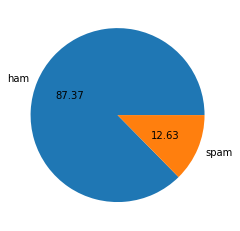

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [19]:
## Data Is Imbalanced
## So we add more columns of char, sentences, words for better model creation

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
# Creating new column 'characters'
df['num_characters'] = df['text'].apply(len)

In [22]:
df.head(2)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [10]:
# Creating new column 'num_words'
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head(2)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [11]:
# Creating new column 'num_sentences'
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head(2)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [27]:
df[['text', 'num_characters', 'num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,78.977945,78.977945,18.453279,1.947185
std,58.236293,58.236293,13.324793,1.362406
min,2.000000,2.000000,1.000000,1.000000
25%,36.000000,36.000000,9.000000,1.000000
50%,60.000000,60.000000,15.000000,1.000000
75%,117.000000,117.000000,26.000000,2.000000
max,910.000000,910.000000,220.000000,28.000000


In [28]:
# Spam
df[df['target']==0][['text', 'num_characters', 'num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000,4516.000000
mean,70.459256,70.459256,17.120903,1.799601
std,56.358207,56.358207,13.493725,1.278465
min,2.000000,2.000000,1.000000,1.000000
25%,34.000000,34.000000,8.000000,1.000000
50%,52.000000,52.000000,13.000000,1.000000
75%,90.000000,90.000000,22.000000,2.000000
max,910.000000,910.000000,220.000000,28.000000


In [29]:
# Ham
df[df['target']==1][['text', 'num_characters', 'num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000,653.000000
mean,137.891271,137.891271,27.667688,2.967841
std,30.137753,30.137753,7.008418,1.483201
min,13.000000,13.000000,2.000000,1.000000
25%,132.000000,132.000000,25.000000,2.000000
50%,149.000000,149.000000,29.000000,3.000000
75%,157.000000,157.000000,32.000000,4.000000
max,224.000000,224.000000,46.000000,8.000000


In [23]:
# Now visualize it 
import seaborn as sns

<AxesSubplot:ylabel='Count'>

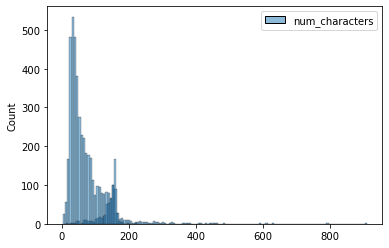

In [31]:
sns.histplot(df[df['target']==0][['num_characters']])
sns.histplot(df[df['target']==1][['num_characters']], color='red')

<AxesSubplot:ylabel='Count'>

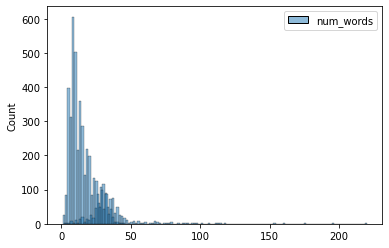

In [32]:
sns.histplot(df[df['target']==0][['num_words']])
sns.histplot(df[df['target']==1][['num_words']], color='red')

<AxesSubplot:ylabel='Count'>

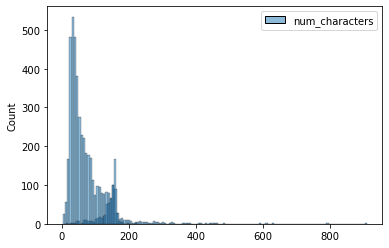

In [33]:
sns.histplot(df[df['target']==0][['num_characters']])
sns.histplot(df[df['target']==1][['num_characters']], color='red')

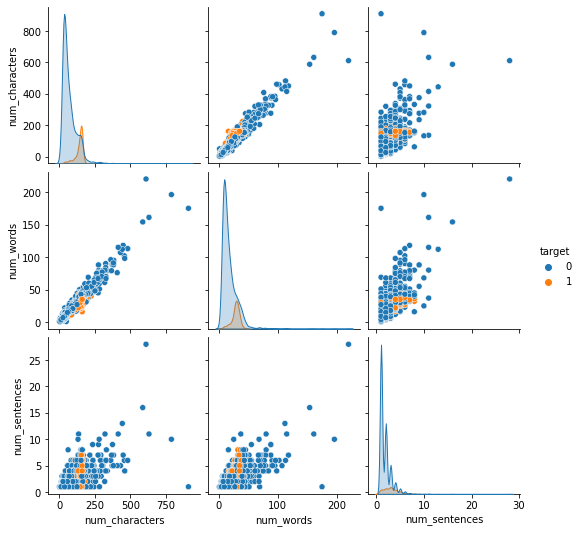

In [34]:
sns.pairplot(df, hue='target')

<AxesSubplot:>

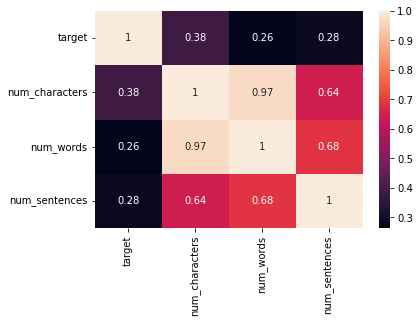

In [35]:
## Now check the correlation between them because there is outliers
sns.heatmap(df.corr(), annot=True)

## 3. Data Preprocessing
1. Lower case
2. tokenization
3. Removing special character
4. Removing stop words(sentence formation) and punctuation
5. Stemming

In [12]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [14]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [38]:
transform_text('Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx')

'okay name ur price long legal wen pick u ave x am xx'

In [40]:
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [15]:
df['transformed_text'] = df['text'].apply(transform_text)

In [16]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=5, background_color='black', collocations=False)

In [17]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=''))

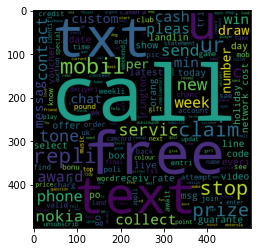

In [44]:
plt.imshow(spam_wc)

In [18]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=''))

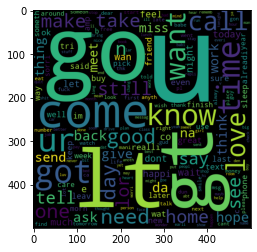

In [46]:
plt.imshow(ham_wc)

In [19]:
spam_corpus = []
for msg in (df[df['target']==1]['transformed_text']).tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [48]:
len(spam_corpus)

9939

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'plt' is not defined

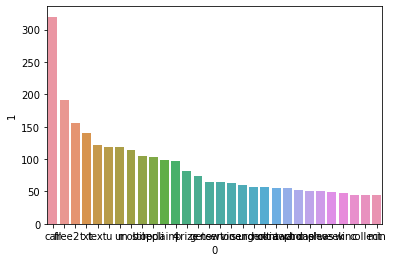

In [24]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [25]:
ham_corpus = []
for msg in (df[df['target']==0]['transformed_text']).tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [51]:
len(ham_corpus)

35394

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'plt' is not defined

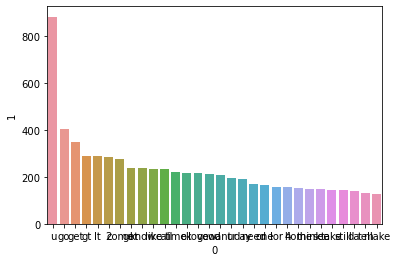

In [26]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [28]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [56]:
X.shape

(5169, 3000)

In [29]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0) 

In [31]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB, BernoulliNB
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.867504835589942
[[771 114]
 [ 23 126]]
0.525


In [33]:
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9680851063829787
[[885   0]
 [ 33 116]]
1.0


In [62]:
bnb.fit(X_train, y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9748549323017408
[[884   1]
 [ 25 124]]
0.992


In [63]:
## In above model building we got tfidf --> MNB as best precision score 
## Now we use more Algorithms to classify

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

In [66]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
#     'xgb':xgb
}

In [67]:
def train_classifier(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [68]:
train_classifier(svc,X_train, X_test, y_train, y_test)

(0.9680851063829787, 0.967741935483871)

In [72]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,X_test,y_train,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9680851063829787
Precision -  0.967741935483871
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9777562862669246
Precision -  0.9772727272727273
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8545454545454545
For  LR
Accuracy -  0.9671179883945842
Precision -  0.9831932773109243
For  RF
Accuracy -  0.9796905222437138
Precision -  1.0
For  AdaBoost
Accuracy -  0.9680851063829787
Precision -  0.967741935483871
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8732394366197183
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9774436090225563
For  GBDT
Accuracy -  0.9555125725338491
Precision -  0.963963963963964


In [73]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
5,RF,0.979691,1.000000
4,LR,0.967118,0.983193
8,ETC,0.978723,0.977444
2,NB,0.977756,0.977273
0,SVC,0.968085,0.967742
6,AdaBoost,0.968085,0.967742
9,GBDT,0.955513,0.963964
7,BgC,0.958414,0.873239
3,DT,0.931335,0.854545


In [74]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [75]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,RF,Accuracy,0.979691
2,LR,Accuracy,0.967118
3,ETC,Accuracy,0.978723
4,NB,Accuracy,0.977756
5,SVC,Accuracy,0.968085
6,AdaBoost,Accuracy,0.968085
7,GBDT,Accuracy,0.955513
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.931335


In [76]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

new_df = performance_df.merge(temp_df,on='Algorithm')

new_df_scaled = new_df.merge(temp_df,on='Algorithm')

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000
1,RF,0.979691,1.000000,0.979691,1.000000,0.979691,1.000000,0.979691,1.000000
2,LR,0.967118,0.983193,0.967118,0.983193,0.967118,0.983193,0.967118,0.983193
3,ETC,0.978723,0.977444,0.978723,0.977444,0.978723,0.977444,0.978723,0.977444
4,NB,0.977756,0.977273,0.977756,0.977273,0.977756,0.977273,0.977756,0.977273
5,SVC,0.968085,0.967742,0.968085,0.967742,0.968085,0.967742,0.968085,0.967742
6,AdaBoost,0.968085,0.967742,0.968085,0.967742,0.968085,0.967742,0.968085,0.967742
7,GBDT,0.955513,0.963964,0.955513,0.963964,0.955513,0.963964,0.955513,0.963964
8,BgC,0.958414,0.873239,0.958414,0.873239,0.958414,0.873239,0.958414,0.873239
9,DT,0.931335,0.854545,0.931335,0.854545,0.931335,0.854545,0.931335,0.854545


In [103]:
# Now we take a voting classifier using ensemble technique
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
knc = KNeighborsClassifier()
mnb = MultinomialNB()

from sklearn.ensemble import VotingClassifier

In [104]:
voting = VotingClassifier(estimators=[('rfc', rfc), ('knc', knc), ('NB', mnb)],voting='soft')

In [105]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('knc', KNeighborsClassifier()),
                             ('NB', MultinomialNB())],
                 voting='soft')

In [106]:
y_pred = voting.predict(X_test)

In [107]:
print('Accuracy',accuracy_score(y_test, y_pred))
print('precision', precision_score(y_test, y_pred))

Accuracy 0.97678916827853
precision 1.0


In [82]:
estimators=[('rfc', rfc), ('knc', knc), ('NB', mnb)]
final_estimators = RandomForestClassifier()

In [83]:
from sklearn.ensemble import StackingClassifier
sc = StackingClassifier(estimators=estimators, final_estimator=final_estimators)

In [84]:
sc.fit(X_train,y_train)

StackingClassifier(estimators=[('rfc',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2)),
                               ('knc', KNeighborsClassifier()),
                               ('NB', MultinomialNB())],
                   final_estimator=RandomForestClassifier())

In [85]:
y_pred = sc.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9835589941972921
Precision 0.9852941176470589


In [86]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(penalty='l2', C=1.0)

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = model.score(X_test, y_test)
y_pred = model.predict(X_test)
print("Precision",precision_score(y_test, y_pred))
print("Test accuracy:",accuracy_score(y_test, y_pred))


Precision 0.991869918699187
Test accuracy: 0.9729206963249516


In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 20],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [88]:
# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20]})

In [89]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


In [90]:
# Evaluate the model on the test data
y_prid = grid_search.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9729206963249516
Precision 0.991869918699187


In [35]:
import pickle

In [93]:
with open('voting_classifier.pkl', 'wb') as file:
    pickle.dump(voting, file)

In [39]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))